# Unit 20.3 - Apply Your Storytelling Skills

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [205]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [207]:
# Clean up columns to make them numeric

df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')

df.Price = df.Price.str.replace('$', '')
df.Price = df.Price.str.replace('Everyone', '0')
df.Price = pd.to_numeric(df.Price, errors='coerce')

df.Installs = df.Installs.str.replace('\+', '')
df.Installs = df.Installs.str.replace(',', '')
df.Installs = df.Installs.str.replace('Free', '')
df.Installs = pd.to_numeric(df.Installs, errors='coerce')

df.Type = df.Type.str.replace('0', 'Free')

df_var = df[df.Size.str.contains('Varies with device')]
df_var.Size = pd.to_numeric(df_var.Size, errors='coerce')

df_thou = df[df.Size.str.contains('\+')]
df_thou.Size = df_thou.Size.str.replace('\+', '')
df_thou.Size = df_thou.Size.str.replace(',', '')
df_thou.Size = pd.to_numeric(df_thou.Size, errors='coerce')

df_k = df[df.Size.str.contains('k')]
df_k.Size = df_k.Size.str.replace('k', '')
df_k.Size = pd.to_numeric(df_k.Size, errors='coerce')

df_M = df[df.Size.str.contains('M')]
df_M.Size = df_M.Size.str.replace('M', '')
df_M.Size = pd.to_numeric(df_M.Size, errors='coerce')
df_M.Size = df_M.Size * 1000

df = pd.concat([df_M, df_k, df_thou, df_var])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


/Users/joeboardman/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [208]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '5.0 and up',
       '6.0 and up', '1.6 and up', '2.1 and up', '2.2 and up',
       '5.1 and up', '1.5 and up', '7.0 and up', '4.3 and up',
       '4.0.3 - 7.1.1', '2.3.3 and up', 'Varies with device',
       '3.2 and up', '4.4W and up', '2.0 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '7.1 and up',
       '2.0.1 and up', '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up',
       '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [209]:
# Fill NaNs
df.Rating = df.Rating.fillna(df.Rating.median())
df.Size = df.Size.fillna(df.Size.median())
df.Reviews = df.Reviews.fillna(df.Reviews.median())
df.Installs = df.Installs.fillna(0)
df.Type = df.Type.fillna('Free')
df['Content Rating'] = df['Content Rating'].fillna('Unrated')
df['Current Ver'] = df['Current Ver'].fillna('1.0.0')
df['Android Ver'] = df['Android Ver'].fillna('1.0.0')
df['Reviews_per_Install'] = df.Reviews / df.Installs
df['app_count'] = 1


In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10841.0,4.207841e+00,5.008934e-01,1.0,4.100,4.300,4.500000e+00,1.900000e+01
Reviews,10841.0,4.441121e+05,2.927629e+06,0.0,38.000,2094.000,5.476800e+04,7.815831e+07
Size,10841.0,2.018307e+04,2.097667e+04,8.5,5900.000,13000.000,2.600000e+04,1.000000e+05
Installs,10841.0,1.546291e+07,8.502557e+07,0.0,1000.000,100000.000,5.000000e+06,1.000000e+09
Price,10841.0,1.027273e+00,1.594897e+01,0.0,0.000,0.000,0.000000e+00,4.000000e+02
Reviews_per_Install,10826.0,inf,NaN,0.0,0.008,0.018,3.925960e-02,inf
app_count,10841.0,1.000000e+00,0.000000e+00,1.0,1.000,1.000,1.000000e+00,1.000000e+00


In [211]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

App 9660
Category 34
Rating 40
Reviews 6001
Size 459
Installs 20
Type 2
Price 92
Content Rating 6
Genres 120
Last Updated 1378
Current Ver 2832
Android Ver 34
Reviews_per_Install 6296
app_count 1


In [212]:
df = df[df.Rating != 19]
df_paid = df[df.Price > 0]
df_lowrating = df[df.Rating < 4]
df_large = df[df.Size > 5000]

In [213]:
#correlation table
corr = df.corr()
#heatmap
corr.round(2).style.background_gradient(cmap='coolwarm')

/Users/joeboardman/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/joeboardman/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Rating,Reviews,Size,Installs,Price,Reviews_per_Install,app_count
Rating,1.000000,0.060000,0.050000,0.050000,-0.020000,0.150000,nan
Reviews,0.060000,1.000000,0.100000,0.640000,-0.010000,0.060000,nan
Size,0.050000,0.100000,1.000000,0.050000,-0.020000,0.040000,nan
Installs,0.050000,0.640000,0.050000,1.000000,-0.010000,-0.020000,nan
Price,-0.020000,-0.010000,-0.020000,-0.010000,1.000000,0.030000,nan
Reviews_per_Install,0.150000,0.060000,0.040000,-0.020000,0.030000,1.000000,nan
app_count,nan,nan,nan,nan,nan,nan,nan


In [214]:
dftype = df.groupby(['Category', 'Type'])[['Reviews_per_Install']].mean().reset_index()
print(type(dftype))
print(dftype)
dftypefree = dftype[dftype.Type == 'Free']
dftypepaid = dftype[dftype.Type == 'Paid']

<class 'pandas.core.frame.DataFrame'>
             Category  Type  Reviews_per_Install
0      ART_AND_DESIGN  Free             0.013615
1      ART_AND_DESIGN  Paid             0.143600
2   AUTO_AND_VEHICLES  Free             0.039347
3   AUTO_AND_VEHICLES  Paid             0.110933
4              BEAUTY  Free             0.015941
..                ...   ...                  ...
58   TRAVEL_AND_LOCAL  Paid             0.054921
59      VIDEO_PLAYERS  Free             0.023274
60      VIDEO_PLAYERS  Paid             0.280050
61            WEATHER  Free             0.025743
62            WEATHER  Paid             0.137944

[63 rows x 3 columns]


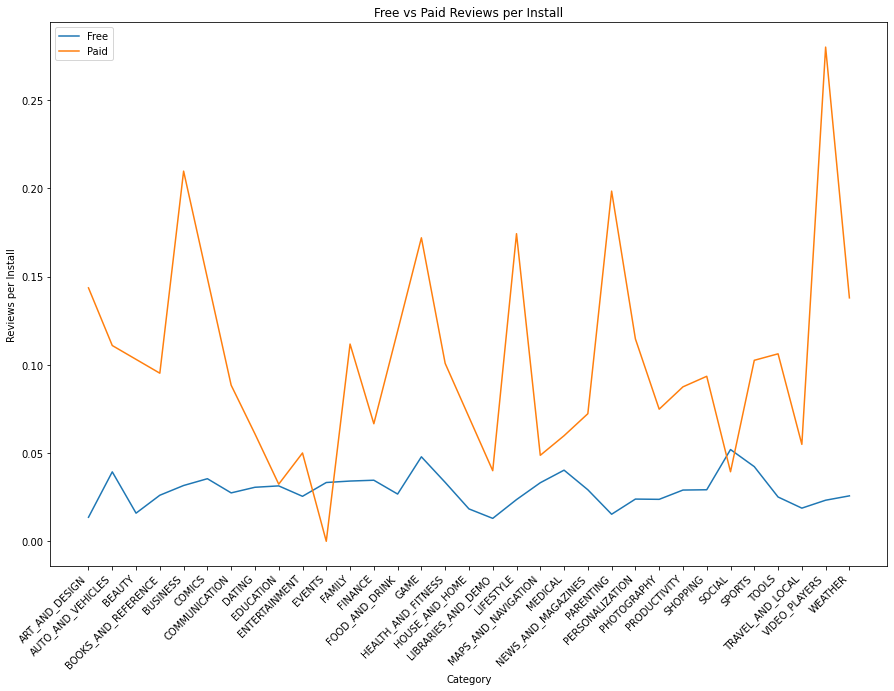

In [215]:
plt.figure(figsize=(15,10))
plt.plot(dftypefree.Category, dftypefree.Reviews_per_Install)
plt.plot(dftypepaid.Category, dftypepaid.Reviews_per_Install)
plt.title('Free vs Paid Reviews per Install')
plt.xlabel('Category')
plt.ylabel('Reviews per Install')
plt.xticks(dftypefree.Category, rotation=45, ha='right')
#plt.xticklabels(dftypefree.Category, rotation=40, ha='right')
plt.legend(['Free', 'Paid'])
plt.show()
plt.close()

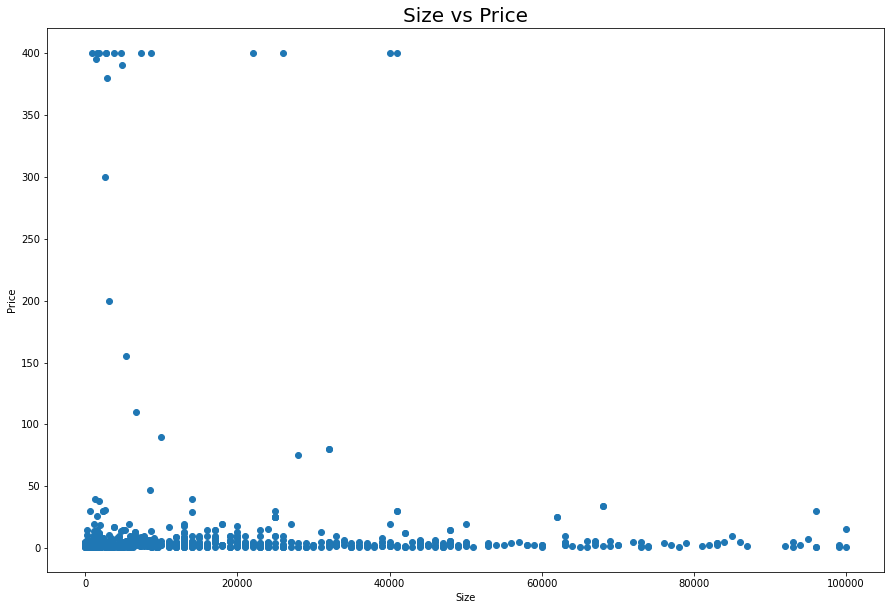

In [216]:
plt.figure(figsize=(15,10))
plt.scatter(df_paid.Size, df_paid.Price)
plt.title('Size vs Price', fontsize=20)
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()
plt.close()

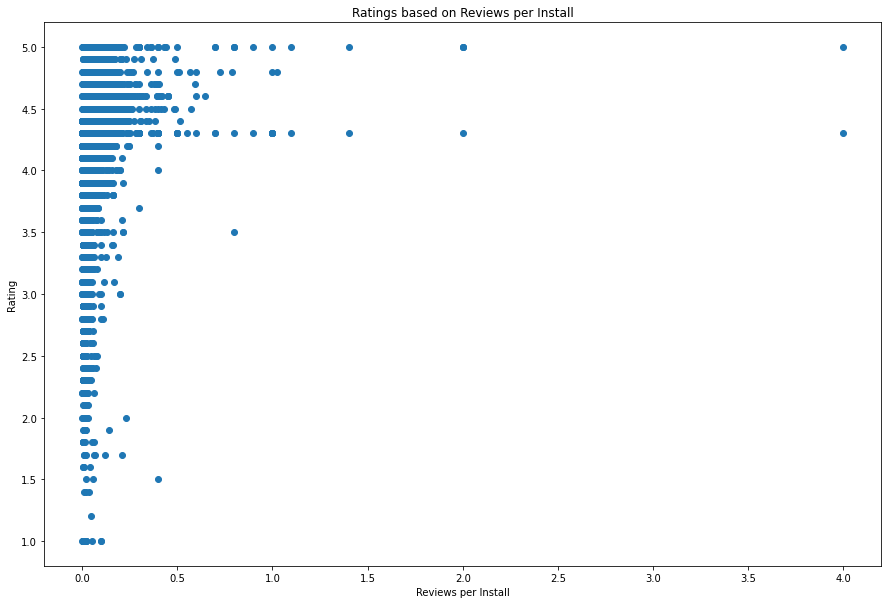

In [217]:
plt.figure(figsize=(15,10))
plt.scatter(df.Reviews_per_Install, df.Rating)
plt.title('Ratings based on Reviews per Install')
plt.xlabel('Reviews per Install')
plt.ylabel('Rating')
plt.show()
plt.close()

In [218]:
print(df.Category.value_counts())
print(df.shape)

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64
(10840, 15)


In [219]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [220]:
df_rating = df.groupby('Category')[['Rating']].mean()
df_rating

,Rating
Category,
ART_AND_DESIGN,4.355385
AUTO_AND_VEHICLES,4.205882
BEAUTY,4.283019
BOOKS_AND_REFERENCE,4.335498
BUSINESS,4.182391
COMICS,4.160000
COMMUNICATION,4.180103
DATING,4.025641
EDUCATION,4.388462


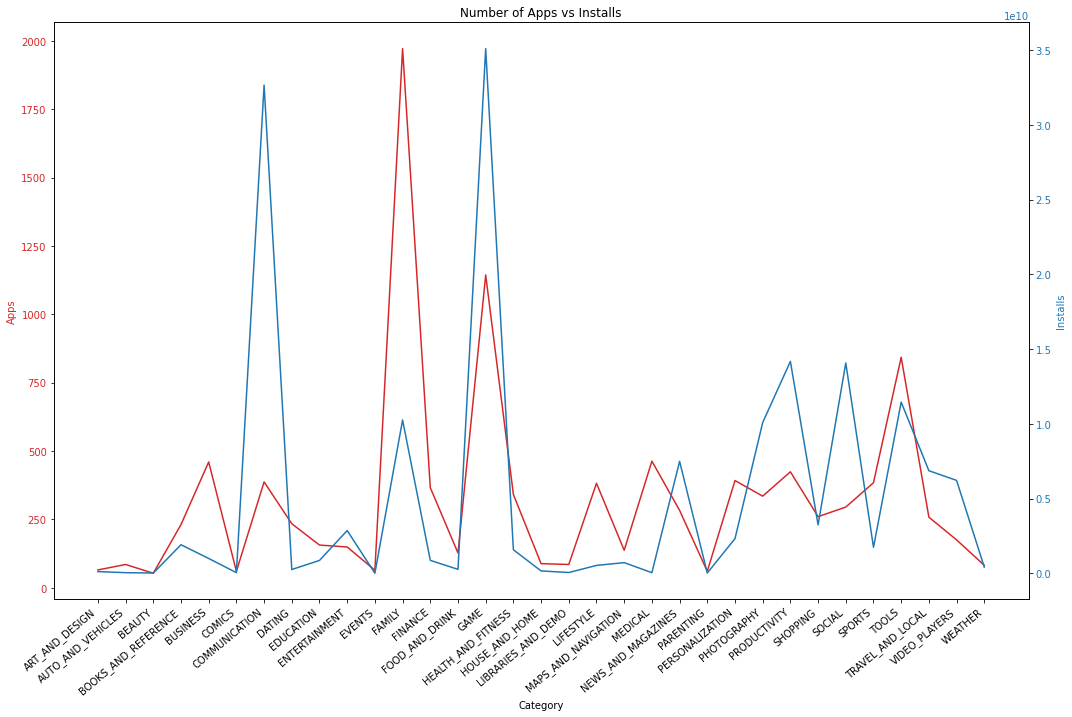

In [221]:
df_app_count = df.groupby('Category')[['app_count']].sum()
df_inst = df.groupby('Category')[['Installs']].sum()

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:red'
ax1.set_xlabel('Category')
ax1.set_ylabel('Apps', color=color)
ax1.plot(df_app_count.index, df_app_count.app_count, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_app_count.index, rotation=40, ha='right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Installs', color=color)  # we already handled the x-label with ax1
ax2.plot(df_inst.index, df_inst.Installs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#
#color = 'tab:green'
#ax3.set_ylabel('Reviews', color=color)  # we already handled the x-label with ax1
#ax3.plot(df_rev.index, df_rev.Reviews, color=color)
#ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of Apps vs Installs')
plt.show()
plt.close()

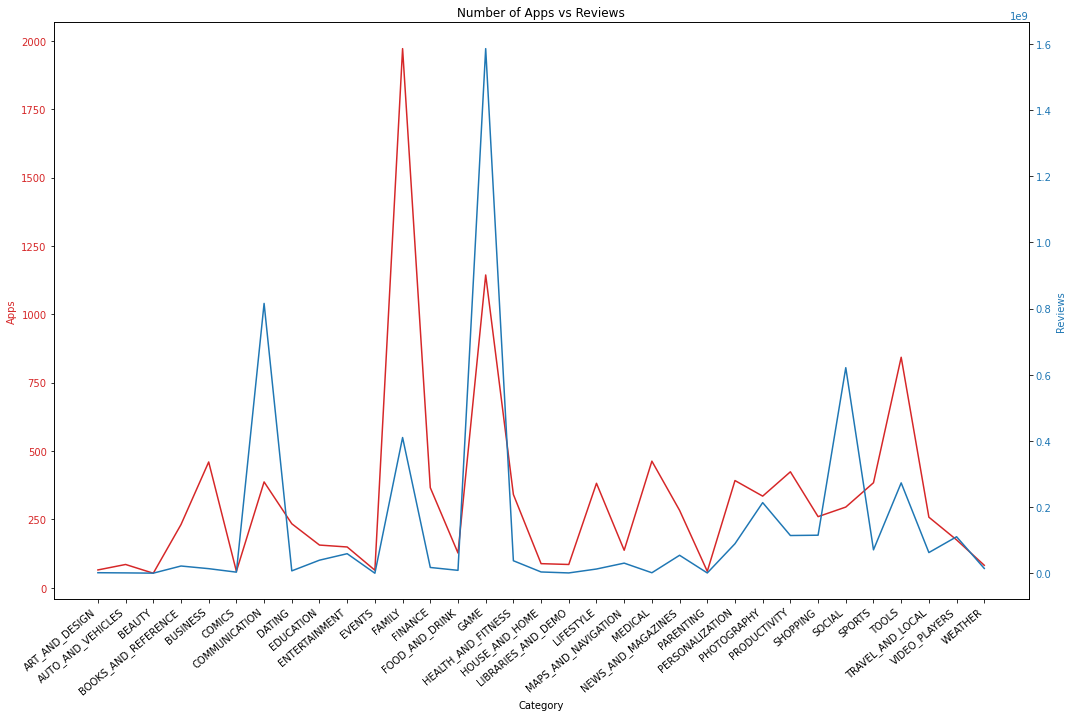

In [222]:
df_rev = df.groupby('Category')[['Reviews']].sum()

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:red'
ax1.set_xlabel('Category')
ax1.set_ylabel('Apps', color=color)
ax1.plot(df_app_count.index, df_app_count.app_count, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_app_count.index, rotation=40, ha='right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Reviews', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rev.index, df_rev.Reviews, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#
#color = 'tab:green'
#ax3.set_ylabel('Reviews', color=color)  # we already handled the x-label with ax1
#ax3.plot(df_rev.index, df_rev.Reviews, color=color)
#ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of Apps vs Reviews')
plt.show()
plt.close()

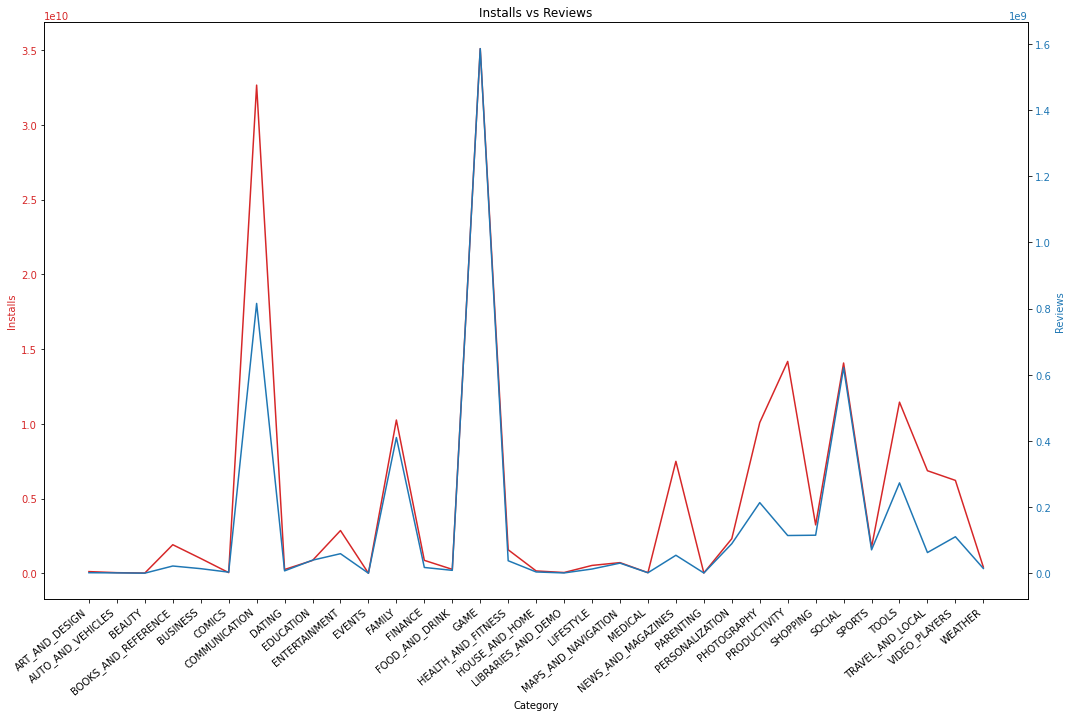

In [223]:
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:red'
ax1.set_xlabel('Category')
ax1.set_ylabel('Installs', color=color)
ax1.plot(df_inst.index, df_inst.Installs, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_inst.index, rotation=40, ha='right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Reviews', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rev.index, df_rev.Reviews, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#
#color = 'tab:green'
#ax3.set_ylabel('Reviews', color=color)  # we already handled the x-label with ax1
#ax3.plot(df_rev.index, df_rev.Reviews, color=color)
#ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Installs vs Reviews')
plt.show()
plt.close()

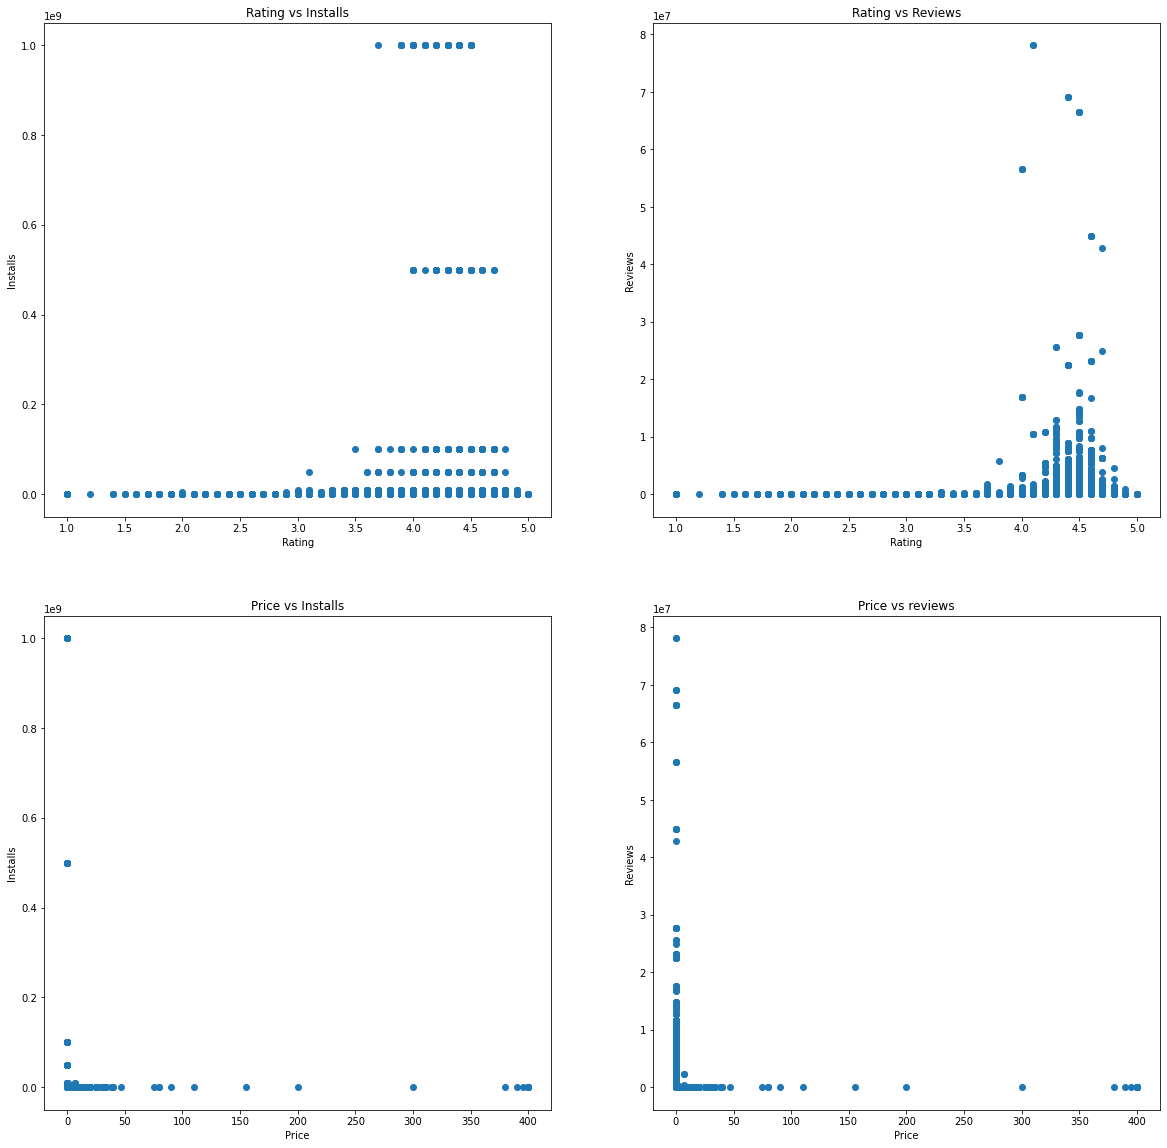

In [224]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))
fig.figsize=(20,20)
axs[0, 0].scatter(df.Rating, df.Installs)
axs[0, 0].set_title('Rating vs Installs')
axs[0, 0].set_xlabel('Rating')
axs[0, 0].set_ylabel('Installs')

axs[0, 1].scatter(df.Rating, df.Reviews)
axs[0, 1].set_title('Rating vs Reviews')
axs[0, 1].set_xlabel('Rating')
axs[0, 1].set_ylabel('Reviews')

axs[1, 0].scatter(df.Price, df.Installs)
axs[1, 0].set_title('Price vs Installs')
axs[1, 0].set_xlabel('Price')
axs[1, 0].set_ylabel('Installs')

axs[1, 1].scatter(df.Price, df.Reviews)
axs[1, 1].set_title('Price vs reviews')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Reviews')

plt.show()
plt.close()

In [225]:
df_exp = df[df.Price > 50]
df_exp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_per_Install,app_count
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up,0.09200,1
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up,0.09200,1
2390,Language Therapy: Aphasia,MEDICAL,4.3,10.0,28000.0,1000.0,Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up,0.01000,1
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,0.06000,1
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,0.07180,1
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0.02750,1
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,0.03547,1
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,0.08560,1
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,0.04110,1
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,0.03734,1


In [226]:
df[df.Category == 'FAMILY'].Genres.value_counts()

Entertainment                  487
Education                      420
Simulation                     189
Casual                         148
Puzzle                          98
                              ... 
Art & Design;Pretend Play        1
Adventure;Brain Games            1
Music & Audio;Music & Video      1
Trivia;Education                 1
Communication;Creativity         1
Name: Genres, Length: 73, dtype: int64

In [227]:
df[df.Category == 'TOOLS']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_per_Install,app_count
3233,Moto File Manager,TOOLS,4.1,38655.0,5900.0,10000000.0,Free,0.00,Everyone,Tools,"February 1, 2018",v3.7.93,5.0 and up,0.003866,1
3237,Motorola Alert,TOOLS,4.2,24199.0,3900.0,50000000.0,Free,0.00,Everyone,Tools,"November 21, 2014",1.02.53,4.4 and up,0.000484,1
3239,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663.0,15000.0,100000000.0,Free,0.00,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up,0.127597,1
3240,Moto Suggestions ™,TOOLS,4.6,308.0,4300.0,1000000.0,Free,0.00,Everyone,Tools,"June 8, 2018",0.2.32,8.0 and up,0.000308,1
3245,myMetro,TOOLS,4.0,26189.0,5300.0,10000000.0,Free,0.00,Everyone,Tools,"June 27, 2018",MyMetro_HTML_2.0_430029,4.0 and up,0.002619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,RAR,TOOLS,4.4,669901.0,13000.0,50000000.0,Free,0.00,Everyone,Tools,"August 7, 2018",Varies with device,Varies with device,0.013398,1
9858,Epson iPrint,TOOLS,4.1,108169.0,13000.0,10000000.0,Free,0.00,Everyone,Tools,"June 25, 2018",Varies with device,Varies with device,0.010817,1
9941,Tasker,TOOLS,4.6,43045.0,13000.0,1000000.0,Paid,2.99,Everyone,Tools,"June 25, 2018",Varies with device,Varies with device,0.043045,1
10044,Ex Explorer : Dual view exproler / file manager,TOOLS,3.9,361.0,13000.0,50000.0,Free,0.00,Everyone,Tools,"July 12, 2018",Varies with device,Varies with device,0.007220,1


# Conclusions:

### Questions I asked:

1. Is there a way to evaluate usage?
2. Are the ratings of different types of apps materially different?
3. Do paid vs free apps drive different ratings and reviews behavior?

### Additional Questions Upon Exploring Data:
1. Is there fluff in this dataset? Are there apps that are hardly used?
2. Are the categories reliable?
3. What is the driver behind apps with high number installs but low number of reviews?

While exploring my questions, I found some interesting things about this dataset:
- While addressing my first question, I realized that I could use reviews as the best indicator of usage of a particular app (I assumed more reviews = more engagement = more usage). When I dug into the reviews I realized there was quite a disparity between the number of apps against the installs and reviews for a couple different categories. This led me to an additional question about fluff in the dataset, the biggest offender being the 'Family' category of apps. This category has by far the highest number of apps, but the total installs and reviews are lower than some categories less than a quarter the size. This tells me that this is somewhat of an 'all other' bucket that includes hundreds of apps that would likely be better suited in other categories. 


- With regard to my second question, There are some discrepancies within the category ratings which range from roughly 4.0 to 4.4. I found that most of the categories on the high and low end of that range have a lower number of reviews so it could be likely due to a sample size issue. The categories with a higher number of apps seem to have an average rating of about 4.2.


- For my third question, the first thing I did was plot the reviews per install for free vs paid apps. It was clear that across nearly all categories there were more reviews per install of the paid apps. This makes sense because if you're paying for an app, you're more likely to use it and thus more likely to review it which lends some credibility to my earlier assumption on usage. Then, out of curiosity, 


### What do I want to explore Further?:
1. I found some situations where the categories seem unreliable (below). I would try to dig into them and maybe even try to realign them to get a more accurate dataset
    1. Within the family category, the two genres with the highest number of apps are 'Entertainment' and 'Education' which are their own categories altogether.
    2. When I looked at the apps that cost more than $50, I found that 16 of the 24 apps were named something to the effect of 'I am Rich'. The weird thing was that those apps were aligned to either 'Family', 'Finance' or 'Lifestyle'. I would think they would be aligned to the same category
2. In situations where we have apps with high installs and low reviews, what is driving that? One of the categories that sparked my interest was 'Productivity'. This trend makes me think people install the productivity apps in hopes that they will use it and better themselves, but most don't end up using them. It is like when people get gym memberships at new years, but it goes unused because it is much more difficult to actually deliver on things like that. 
    


### Target Audience Type: Non-Technical